### Acquire and Analyze 

Hunting has always been a passion of mine. When you put that with data analysis, fun aspects can take place. More specifically, text minning on a well known social media outlet known as Twitter. To combine the two, it was my desire to answer the question, "On which day of the week is #hunting posted more on Twitter?". This question needed data to be acquired and then analyzed for my insight. The following code and sections explain the process and outcome of my research. 



In [1]:
#import all keys and packages for tweepy and pandas
import datetime
import tweepy 
import os
import pandas as pd

from API_keys import api_key, api_key_secret, access_token, access_token_secret

In [2]:
# Authenticate the Tweepy API
auth = tweepy.OAuthHandler(api_key,api_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In the previous code, I gained access using my specific credentials through the Twitter API Developer, I began to dig into what I wanted to pull and the data I wanted to look at. 

In order to answer the question "On which day of the week is #hunting posted more on Twitter?", I needed to understand how many tweets with the #hunting were sent in a seven day period during the regular hunting season. To take it one step furter, I also wanted to understand the locations of the users. 

I began the process with first gathering data. I placed my date to grab seven days prior and "told" twitter what hashtag I was specifically looking for. Once this was completed, I placed the api search into the "tweets" variable for holding. 

In [4]:
date_since = "2020-10-18" #went a more manual way to get the date rather than datetime, but either works
search_words = "#hunting" + '-filter:retweets'

In [5]:
#created a variable to store the api search rather for future calls to pull data below and change up the output.

tweets = tweepy.Cursor(api.search,
               # tweet_mode is defaulted to short, which only holds the first 140 characters of a Tweet.
               tweet_mode='extended',
               q=search_words,
               lang='en', since = date_since).items()



       

Now that the data was pulled from Twitter, a new variable was created from "tweets" to obtain the necessary information to properlly analyze. This data included the date the tweet was created, the user name, the location of the user, and the full tweet. After the necessary data was extracted in the variable "user_info", it was placed in to a "tweet_text" data frame. 

The dataframe shows the analyst, in table format, what was pulled and allows for faster analysis. In order to keep this data from being changed too drastically, it was converted and stored as a csv on the machine. 

In [6]:
#list comprehension to pull date, user, location, and tweet

user_info = [[item.created_at,item.user.screen_name, item.user.location, item.full_text] for item in tweets]


In [7]:
#placed the user info into a dataframe for future analyzing within SQL or python

tweet_text = pd.DataFrame(data=user_info, columns=['date', 'user', 'location', 'tweet'])



In [8]:
tweet_text

,date,user,location,tweet
0,2020-10-25 23:05:03,DeerGearTV,"Deer Stand, USA",Did you spend the weekend check your trail cam...
1,2020-10-25 23:03:02,AirRiderHover,"Parry Sound, Ontario",Need an All Seasons Vehicle? We have a Hovercr...
2,2020-10-25 23:00:14,LunkersClub,,Lunkers Tip:\n\nFace the Wind\nSacrifice some ...
3,2020-10-25 22:54:11,MichelleMoggio,"Nashville, TN U.S.A.",Paris Untamed: Call of the Wild https://t.co/J...
4,2020-10-25 22:48:36,EmpireHunting,"Ontario, Canada",He carried this for a good kilometre lol... #e...
...,...,...,...,...
1601,2020-10-18 00:41:02,HellOnEarth215,"Philadelphia, PA","Legendary Hunting\nOct. 24, 2020 @ 3pm)\n#Hell..."
1602,2020-10-18 00:34:00,ProtectHarvest,USA,"Why is it important to stand behind sportsmen,..."
1603,2020-10-18 00:20:53,CrazyBackyard,Deutschland,Hey buddy! (02:25:00 AM) #wildkamera #wildlife...
1604,2020-10-18 00:11:46,JA_KindleFireTV,United Kingdom,Zombie Fortress Evolution: Dino\n\n‼OUT NOW‼\n...


In [ ]:
tweet_text.to_csv('hunting_tweets.csv')

With the data sucessfully pulled and stored in a proper format, the cleaning and analysis was able to take place. The first part was the view the locations of the users to get a good feel for the representation. In doing so, the information showed that several user locations stated "USA" and "United States". 

In an attempt to clean this up even more and show truly the locations such as US state the user is from, the location USA was removed. This does remove data that can be analyzed in the future, but for the purpose of state location, it helps to clean up and show what users, by state, are posting on specific days. 

In [34]:
tweet_text['location'].value_counts()[:10]

                   317
Denver, CO          77
MN, USA             46
United States       43
United Kingdom      37
USA                 27
Texas, USA          24
Deer Stand, USA     22
Atlanta, GA         20
Deutschland         19
Name: location, dtype: int64

In [32]:
new_data = tweet_text.replace(to_replace='United States', value='USA')

In [41]:
new_data['location'].value_counts()[:11]

                   317
Denver, CO          77
USA                 70
MN, USA             46
United Kingdom      37
Texas, USA          24
Deer Stand, USA     22
Atlanta, GA         20
Deutschland         19
Wisconsin, USA      18
Alabama, USA        16
Name: location, dtype: int64

In [55]:
#drop the location USA in the data frame to show only us states and UK as locations.
new_data.drop(new_data[new_data['location']=='USA'].index,inplace = True)

In [53]:
new_data['location'].value_counts()[:10]

                   317
Denver, CO          77
MN, USA             46
United Kingdom      37
Texas, USA          24
Deer Stand, USA     22
Atlanta, GA         20
Deutschland         19
Wisconsin, USA      18
Alabama, USA        16
Name: location, dtype: int64

For the last bit of cleaning, the dataframe was stored with dates that utilized the time format. Although this is very helpful to show the hours that users are posting, for this study, it proved to create extra bars in the charts and a very poor visulization. Thus, the date was converted to a new column and removed the time stamp. This date column returned the value counts for all tweets on the given date. 

In [45]:
#create new column to store date with removed hr:mm:ss 
new_data['new_date'] = new_data['date'].dt.date

In [46]:
new_data.head()

,date,user,location,tweet,new_date
0,2020-10-25 23:05:03,DeerGearTV,"Deer Stand, USA",Did you spend the weekend check your trail cam...,2020-10-25
1,2020-10-25 23:03:02,AirRiderHover,"Parry Sound, Ontario",Need an All Seasons Vehicle? We have a Hovercr...,2020-10-25
2,2020-10-25 23:00:14,LunkersClub,,Lunkers Tip:\n\nFace the Wind\nSacrifice some ...,2020-10-25
3,2020-10-25 22:54:11,MichelleMoggio,"Nashville, TN U.S.A.",Paris Untamed: Call of the Wild https://t.co/J...,2020-10-25
4,2020-10-25 22:48:36,EmpireHunting,"Ontario, Canada",He carried this for a good kilometre lol... #e...,2020-10-25


In [47]:
new_data['new_date'].value_counts()[:3]

2020-10-22    248
2020-10-20    225
2020-10-23    225
Name: new_date, dtype: int64

Now that the dataframe is cleaned to the standard for this A&A, visualizations were created to answer the questions, "What day is #hunting tweeted the most, and from what locations are the users?". In the first bar chart, it shows that Denever, CO has the most users tweeting #hunting, with the state Minnesota being next up. Denver does make sense, as it is a state known for its outdoors and hunting population. However, it is surprissing to find that the UK was close in tweets for the #hunting and was not expected to even show as a part of the population. 

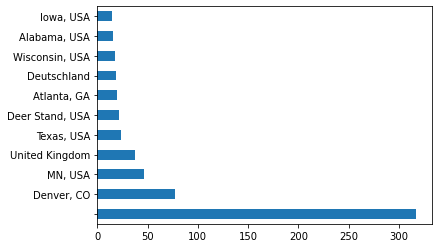

In [56]:
new_data['location'].value_counts()[:11].plot(kind='barh')

Knowing that Denver showed the most in a one area of users posting #hunting, the final graph shows the date on which these were posted. The original hypothesis was that Friday or Monday would show the largest population of posts based on the pre and post hunting trips done on the weekends. However, by looking at the data and the bar chart, we show that Thursday had the most post and Tuesday was next in line. After thinking on this a bit more, it left the suggestion that users were away on Friday and Monday for as that was days in the field of hunting. More data would be needed to draw on that conclusion. 

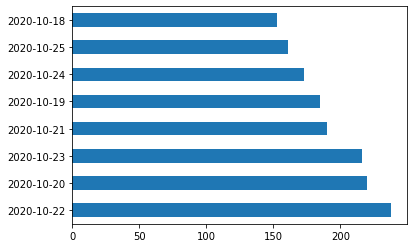

In [57]:
new_data['new_date'].value_counts().plot(kind = 'barh')

In conclusion, the data set that was pulled using the Twitter api produced valuable information. Once the tweets were gathered, stored into a dataframe, and cleaned, the analysis provided answers to the questions of when and where are tweets containing #huting taken place. From the orginal assumption that Friday and Mondays would be the larger tweeting dates, it was shown that this was not the case and Thursday and Tuesdays had more tweets with the given hashtag. To take this analysis further, it would be suggested to find the earliest hunting season for a specific species such as Elk in the US and to run the API search through the end of the latest season dates. From here, a larger data set has the potential to show trends in dates, locations and even times of when posts are made for better marketing and business analysis. 